<a href="https://colab.research.google.com/github/khdanzi/oibsip_taskno/blob/main/task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OASIS INFOBYTE INTERNSHIP** : DATA ANALYTICS

## TASK 8 :  Unveiling the Android App Market: Analyzing Google Play Store Data

**Introduction**:

The Android app market, represented by the Google Play Store, is a dynamic ecosystem with millions of apps catering to diverse user needs. Analyzing this data can provide valuable insights into app distribution, user preferences, and market trends. By applying data analytics and visualization techniques, this project aims to uncover key patterns and trends within the Google Play Store, helping developers, marketers, and users make informed decisions.

**Objective**:

The objective of this project is to analyze and visualize Google Play Store data to gain a comprehensive understanding of the Android app market. This includes cleaning and categorizing the data, exploring app distribution across categories, analyzing metrics like ratings and pricing trends, conducting sentiment analysis on user reviews, and creating interactive visualizations to effectively communicate findings.

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#collecting data from drive
from google.colab import drive
drive.mount('/content/drive')

!unzip 'drive/My Drive/Colab Notebooks/android app/apps.csv.zip' -d 'drive/My Drive'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  drive/My Drive/Colab Notebooks/android app/apps.csv.zip
replace drive/My Drive/apps.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace drive/My Drive/apps.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: drive/My Drive/apps.csv  


In [ ]:
#reading data
apps = pd.read_csv('drive/My Drive/apps.csv')
print("Successfully Imported Data!")
apps.head(6)

Successfully Imported Data!


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up


In [ ]:
apps.shape

(9659, 14)

In [ ]:
print(apps.isna().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [ ]:
# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Print the total number of unique apps
num_unique_apps = len(apps['App'].unique())
print('Total number of unique apps in the dataset = ', num_unique_apps)
print(apps.info())

# Have a look at a random sample of n rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659
Total number of unique apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9373,10548,FK Vozdovac,SPORTS,NaN,1,26.0,10+,Free,0,Everyone,Sports,"February 19, 2018",1,4.1 and up
7882,9001,DW Tech Tools,BUSINESS,NaN,1,5.9,100+,Free,0,Everyone,Business,"July 24, 2018",26.1,4.1 and up
546,647,Chat Click - Dating Search,DATING,NaN,4,3.8,500+,Free,0,Mature 17+,Dating,"July 11, 2018",1,3.0 and up
257,262,ClickMeeting Webinars,BUSINESS,3.8,5211,26.0,"1,000,000+",Free,0,Everyone,Business,"July 30, 2018",3.3.0,4.0 and up
9454,10629,Florida Wildflowers,FAMILY,5.0,5,69.0,"1,000+",Free,0,Everyone,Education,"July 10, 2017",1.5,4.1 and up


In [ ]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

Number of categories =  33


<ipython-input-13-202fb4cb0dfc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=num_apps_in_category.index, y=num_apps_in_category.values, palette='viridis')


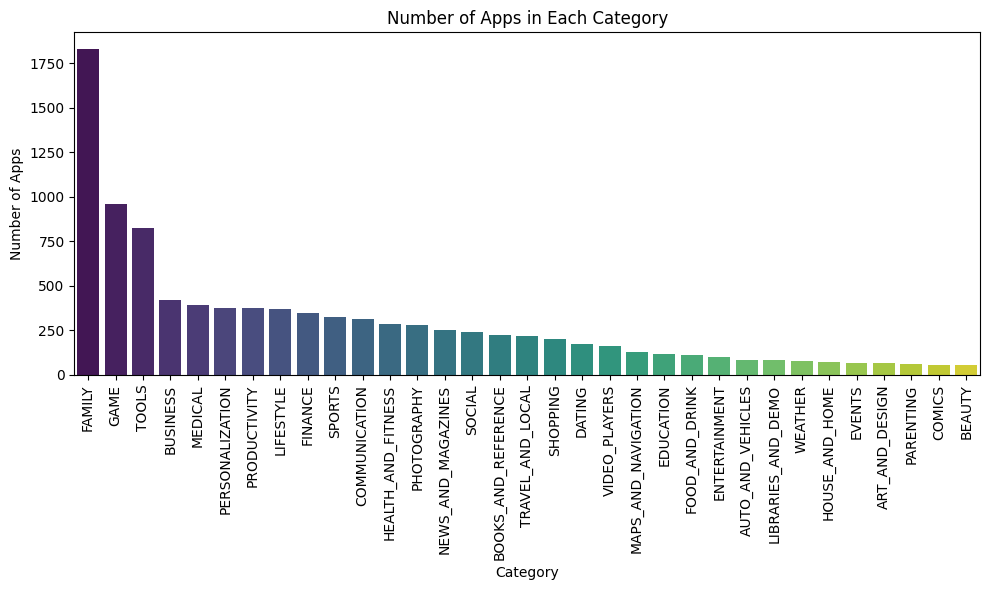

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'apps' is your DataFrame containing the 'Category' column

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

# Plotting using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=num_apps_in_category.index, y=num_apps_in_category.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps in Each Category')
plt.tight_layout()
plt.show()

Average app rating =  4.173243045387994


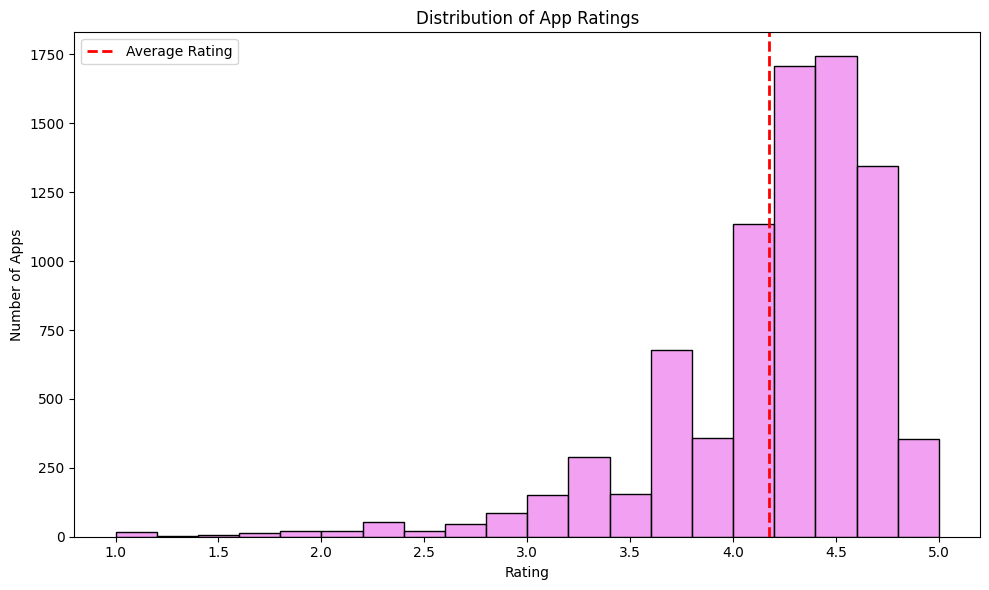

In [ ]:
# Assuming 'apps' is your DataFrame containing the 'Rating' column

# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
plt.figure(figsize=(10, 6))
sns.histplot(apps['Rating'], bins=20, kde=False, color='Violet')
plt.axvline(avg_app_rating, color='red', linestyle='--', linewidth=2, label='Average Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Ratings')
plt.legend()
plt.tight_layout()
plt.show()

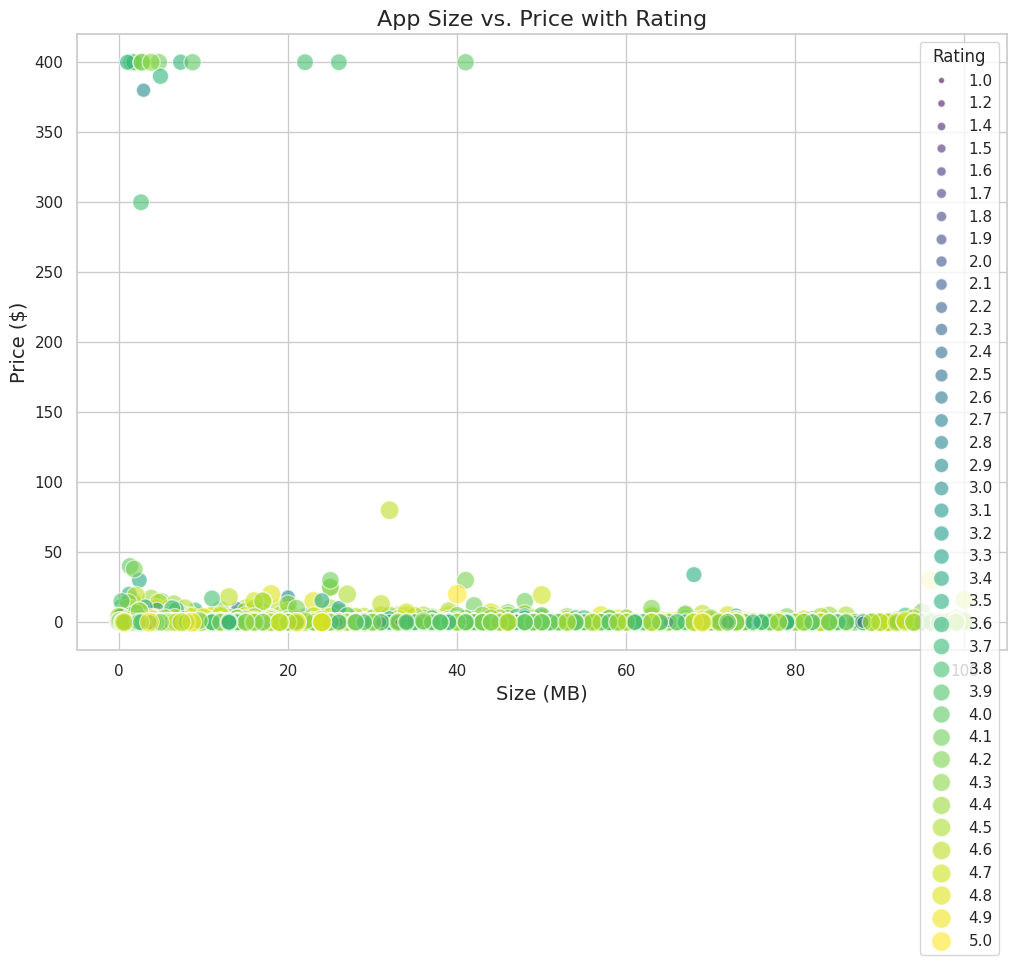

In [ ]:
# Set up the plotting environment
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create the scatter plot with color representing the Rating
scatter_plot = sns.scatterplot(data=apps, x='Size', y='Price', hue='Rating', palette='viridis', size='Rating', sizes=(20, 200), alpha=0.6, legend='full')

# Add titles and labels
scatter_plot.set_title('App Size vs. Price with Rating', fontsize=16)
scatter_plot.set_xlabel('Size (MB)', fontsize=14)
scatter_plot.set_ylabel('Price ($)', fontsize=14)

# Display the legend
plt.legend(loc='upper right', title='Rating')

# Show the plot
plt.show()

<ipython-input-16-0eca96c69656>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45, ha='right')


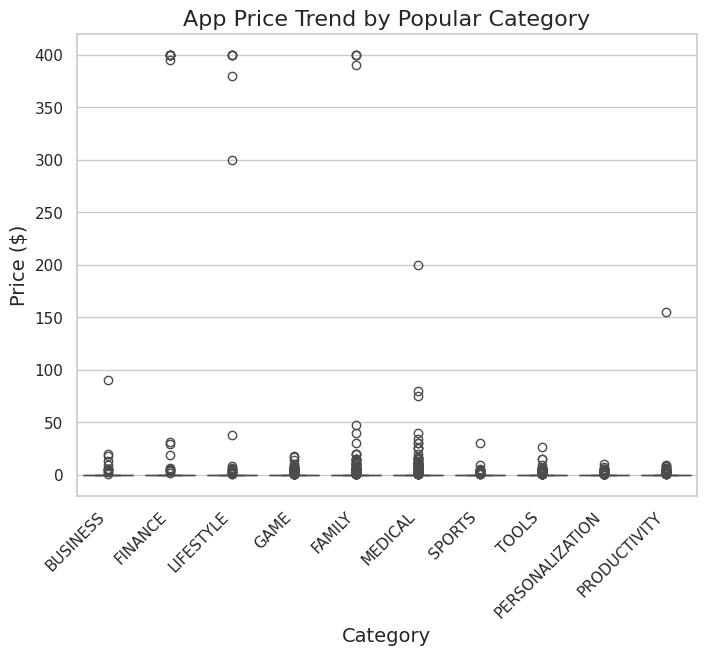

In [ ]:
# Select popular app categories
popular_categories = apps['Category'].value_counts().index[:10]  # Top 10 categories by app count

# Filter the dataset for these popular categories
popular_apps_data = apps[apps['Category'].isin(popular_categories)]

# Set up the plotting environment
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the boxplot to examine the price trend by category
box_plot = sns.boxplot(data=popular_apps_data, x='Category', y='Price')
box_plot.set_title('App Price Trend by Popular Category', fontsize=16)
box_plot.set_xlabel('Category', fontsize=14)
box_plot.set_ylabel('Price ($)', fontsize=14)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

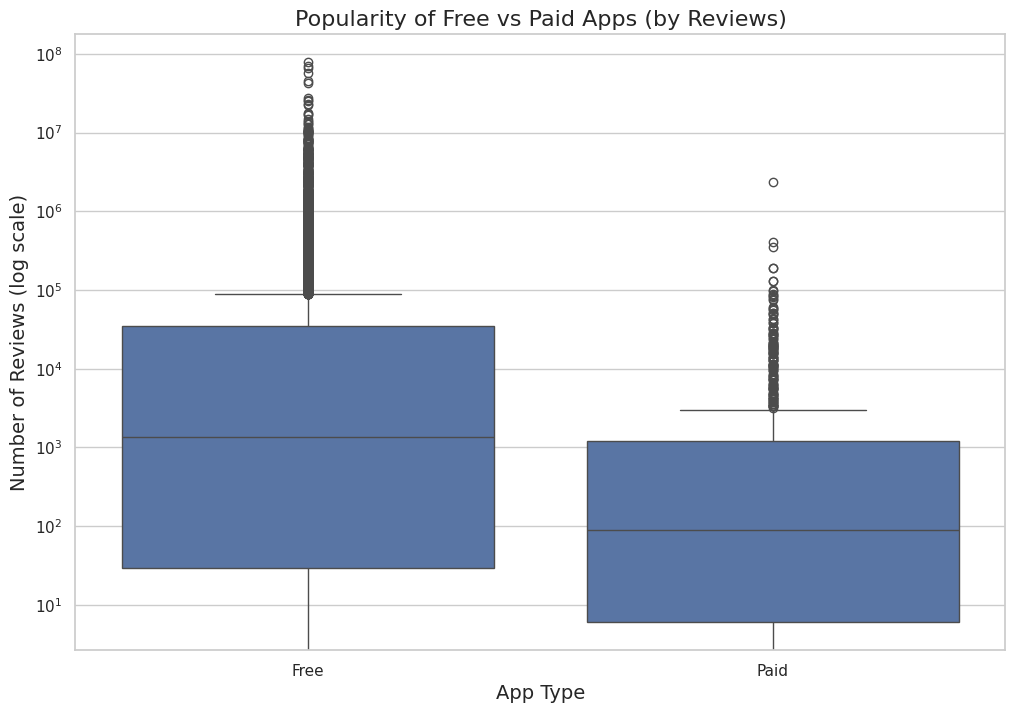

In [ ]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create a boxplot to compare the number of reviews for free and paid apps
ax = sns.boxplot(x='Type', y='Reviews', data=apps)
ax.set_yscale('log')  # Use a logarithmic scale for better visualization
ax.set_title('Popularity of Free vs Paid Apps (by Reviews)', fontsize=16)
ax.set_xlabel('App Type', fontsize=14)
ax.set_ylabel('Number of Reviews (log scale)', fontsize=14)

# Display the plot
plt.show()

Archive:  drive/My Drive/Colab Notebooks/android app/user_reviews.csv.zip
replace drive/My Drive/Colab Notebooks/android app/user_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: drive/My Drive/Colab Notebooks/android app/user_reviews.csv  
Successfully Imported Data!


<ipython-input-20-c0428b3d0d54>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='muted')


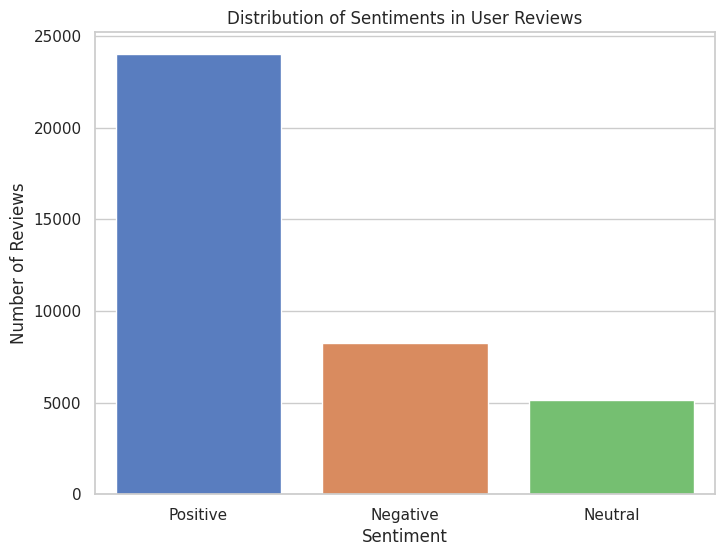

In [ ]:
# Load user_reviews.csv
!unzip 'drive/My Drive/Colab Notebooks/android app/user_reviews.csv.zip' -d 'drive/My Drive/Colab Notebooks/android app'

import pandas as pd
reviews_df = pd.read_csv('drive/My Drive/Colab Notebooks/android app/user_reviews.csv')
print("Successfully Imported Data!")
df.head(6)
# Sentiment Analysis: Distribution of sentiments in user reviews
plt.figure(figsize=(8, 6))
sentiment_count = reviews_df['Sentiment'].value_counts()
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='muted')
plt.title('Distribution of Sentiments in User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

<ipython-input-21-9211ea8b9421>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df, palette='Set3')


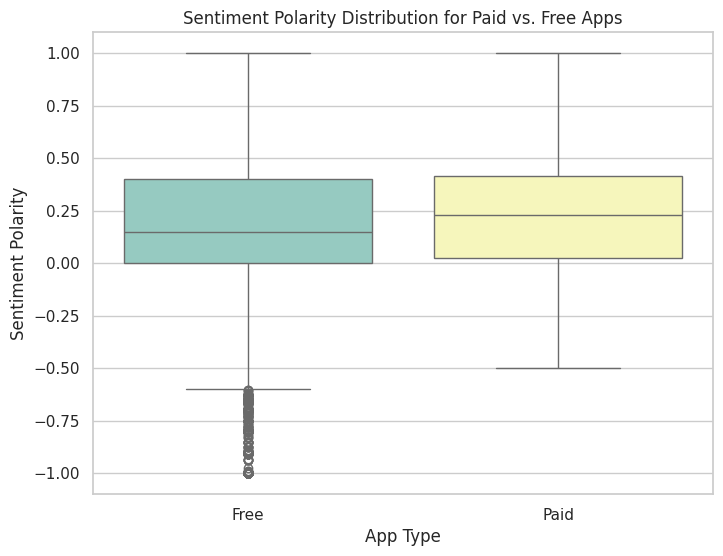

In [ ]:
# Join and merge the two dataframes
merged_df = pd.merge(apps, reviews_df, on='App', how='inner')

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

# Set the plotting style and create a figure
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))

# Create a boxplot to visualize sentiment polarity for paid vs. free apps
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df, palette='Set3')
ax.set_title('Sentiment Polarity Distribution for Paid vs. Free Apps')
ax.set_xlabel('App Type')
ax.set_ylabel('Sentiment Polarity')

plt.show()